# Project_01: Customer_Sales_Analysis

#### Goal:
Analyze sales data to extract valuable business insights, such as:

Which products are selling the most?

Who are the top customers?

Which months generate the highest revenue?

#### Skills Covered:

SQL (querying & aggregating data)

 Pandas (data manipulation)

 Matplotlib & Seaborn (data visualization)

 Business analysis (understanding trends & insights)



## step.1 Data Exploration

### 1.1 importing important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 1.2 Loading & Viewing the dataset 


In [2]:
df = pd.read_csv("train.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


Extra 

In [3]:
# set option to be maximum for Rows and columns

pd.set_option ('display.max_columns', None)
pd.set_option ('display.max_rows', None)

# hide all warnings
import warnings
warnings.filterwarnings('ignore')

### 1.3 Checking Data info, shape, columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [8]:
df.shape

(9800, 18)

In [9]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

#### Dataset Overview 
The dataset contains 9,800 rows and 18 columns, covering customer orders, sales, shipping details, and product categories etc

###### Key Observations:

Date Columns (Order Date & Ship Date) are stored as text (object) and need conversion to datetime format.

Sales Column (Sales) is in float format and ready for analysis.

Postal Code has some missing values (only 9,789 non-null out of 9,800).

Multiple categorical columns (Customer Name, Segment, Category, etc.) useful for analysis.



## step.2 Data Cleaning & Preprocessing:



Convert date columns to proper datetime format.

Handle missing values in Postal Code.

Remove duplicates (if any).

We'll start by fixing date formats, handling missing values, and removing duplicates.

### 2.1 Convert Date Columns to Datetime Format
 The Order Date and Ship Date columns are in text format. We need to convert them to datetime format.


In [12]:
import pandas as pd

# Convert 'Order Date' and 'Ship Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')


In [13]:
# Verify the changes
print(df[['Order Date', 'Ship Date']].dtypes)


Order Date    datetime64[ns]
Ship Date     datetime64[ns]
dtype: object


### 2.2 Handling Missing Values
####  Handle Missing Values in Postal Code

 The Postal Code column has some missing values. We have two options:

1. Drop rows with missing values (if it's a small portion of data).

2. Fill missing values with a default value (e.g., 00000).

In [15]:
# checking the Missing Values First
df.isnull().sum()

Row ID              0
Order ID            0
Order Date       5841
Ship Date        5985
Ship Mode           0
Customer ID         0
Customer Name       0
Segment             0
Country             0
City                0
State               0
Postal Code        11
Region              0
Product ID          0
Category            0
Sub-Category        0
Product Name        0
Sales               0
dtype: int64

#### Our Data has missing values in three columns:

Order Date (5,841 missing)

Ship Date (5,985 missing)

Postal Code (11 missing)

### Handling Missing Values
2.2.1. Order Date & Ship Date (Missing a lot of values!)

Since more than half of the values are missing in Order Date and Ship Date, 

In [22]:
df['Order Date'].fillna(method='ffill', inplace=True)
df['Ship Date'].fillna(method='ffill', inplace=True)


2.2.2 Postal Code (Only 11 Missing) 

In [24]:
# Fill missing Postal Codes with a default value
df['Postal Code'].fillna(0, inplace=True)  # Replace with '0' (or any default value)

In [25]:
# Verify if there are still missing values
print(df.isnull().sum())


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64


### 2.3 Remove Duplicate Rows
 Duplicate rows can cause incorrect analysis. We need to check and remove them.


In [31]:
# checking for duplicate values
df.duplicated().sum()

np.int64(0)

In [ ]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

In [33]:
# Verify if duplicates are removed
print(f"Total duplicates after removal: {df.duplicated().sum()}")


Total duplicates after removal: 0


#### Now our data is cleaned, let’s move to Step 3: Exploratory Data Analysis (EDA) to extract insights.



## Step.3 Exploratory Data Analysis (EDA)
We'll analyze:

 Total Sales & Profit

 Top-Selling Products

 Top Customers by Spending

 Sales Trends Over Time

#### 3.1: Total Sales Overview
Let's calculate the total revenue and average order value.

In [36]:
# Total Revenue and Profit
total_sales = df['Sales'].sum()
#total_profit = df['Profit'].sum()
average_order_value = df['Sales'].mean()

print(f"Total Sales: ${total_sales:,.2f}")
#print(f"Total Profit: ${total_profit:,.2f}")
print(f"Average Order Value: ${average_order_value:,.2f}")


Total Sales: $2,261,536.78
Average Order Value: $230.77


#### 3.2: Top 10 Best-Selling Products
We’ll group data by Product Name and sum the Sales.

In [37]:
# Top 10 best-selling products
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

# Display results
print(top_products)


Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64


#### 3.3: Top 10 Customers by Spending
Let's identify the most valuable customers.

In [38]:
# Top 10 customers by total spending
top_customers = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)

# Display results
print(top_customers)


Customer Name
Sean Miller           25043.050
Tamara Chand          19052.218
Raymond Buch          15117.339
Tom Ashbrook          14595.620
Adrian Barton         14473.571
Ken Lonsdale          14175.229
Sanjit Chand          14142.334
Hunter Lopez          12873.298
Sanjit Engle          12209.438
Christopher Conant    12129.072
Name: Sales, dtype: float64


#### 3.4: Sales Trends Over Time
We’ll analyze monthly sales trends using visualization.

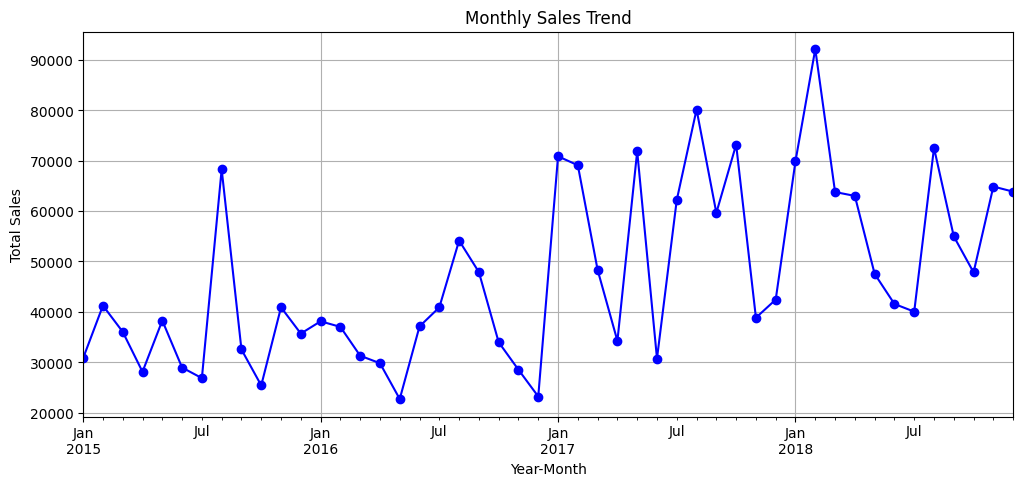

In [39]:
import matplotlib.pyplot as plt

# Extract year-month for trend analysis
df['Year-Month'] = df['Order Date'].dt.to_period('M')

# Group by year-month and sum sales
monthly_sales = df.groupby('Year-Month')['Sales'].sum()

# Plot sales trend
plt.figure(figsize=(12, 5))
monthly_sales.plot(kind='line', marker='o', color='b')
plt.title('Monthly Sales Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


#### 3.5: Statistical Analysis on our data

In [54]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Year-Month
count,9800.000000,9800,9800,9800.000000,9800.000000,9800
mean,4900.500000,2017-03-28 04:16:42.122449152,2017-04-08 21:46:08.326530816,55211.280918,230.769059,2017-03-21 05:08:51.918367488
min,1.000000,2015-01-02 00:00:00,2015-01-04 00:00:00,0.000000,0.444000,2015-01-01 00:00:00
25%,2450.750000,2016-04-10 00:00:00,2016-04-11 00:00:00,23223.000000,17.248000,2016-04-01 00:00:00
50%,4900.500000,2017-05-12 00:00:00,2017-06-11 00:00:00,57551.000000,54.490000,2017-05-01 00:00:00
75%,7350.250000,2018-03-08 00:00:00,2018-04-11 06:00:00,90008.000000,210.605000,2018-03-01 00:00:00
max,9800.000000,2018-12-11 00:00:00,2019-05-01 00:00:00,99301.000000,22638.480000,2018-12-01 00:00:00
std,2829.160653,NaN,NaN,32076.677954,626.651875,NaN


Now we've done basic EDA, let's move to Step 4: Advanced Analysis & SQL Queries to deepen our understanding of the data.

## Step.4: Advanced Analysis & SQL Queries
We'll now focus on SQL-based data analysis by running queries on the dataset using SQLite in Python.

#### 4.1: Load Data into SQL Database
Before running queries, we need to store the dataset in an SQL database.

In [46]:
import sqlite3

# Create an SQLite database (stored in memory)
conn = sqlite3.connect(":memory:")
cursor = conn.cursor()

# Load DataFrame into SQL
df.to_sql("superstore", conn, index=False, if_exists="replace")

print("Data successfully loaded into SQL database!")


Data successfully loaded into SQL database!


#### 4.2: SQL Query - Total Sales by Category
We will group data by Category to find the total sales for each.


In [48]:
query = """
SELECT Category, SUM(Sales) AS Total_Sales
FROM superstore
GROUP BY Category
ORDER BY Total_Sales DESC;
"""

# Run the query
category_sales = pd.read_sql(query, conn)

# Display results
print(category_sales)


          Category  Total_Sales
0       Technology  827455.8730
1        Furniture  728658.5757
2  Office Supplies  705422.3340


#### 4.3: SQL Query - Top 5 Customers by Total Spending
We will find the top 5 customers who spent the most.

In [49]:
query = """
SELECT [Customer Name], SUM(Sales) AS Total_Spending
FROM superstore
GROUP BY [Customer Name]
ORDER BY Total_Spending DESC
LIMIT 5;
"""

# Run the query
top_customers = pd.read_sql(query, conn)

# Display results
print(top_customers)


   Customer Name  Total_Spending
0    Sean Miller       25043.050
1   Tamara Chand       19052.218
2   Raymond Buch       15117.339
3   Tom Ashbrook       14595.620
4  Adrian Barton       14473.571


#### 4.4: SQL Query - Monthly Sales Trend
We will analyze monthly sales trends using SQL.

In [50]:
query = """
SELECT strftime('%Y-%m', [Order Date]) AS Month, SUM(Sales) AS Total_Sales
FROM superstore
GROUP BY Month
ORDER BY Month;
"""

# Run the query
monthly_sales = pd.read_sql(query, conn)

# Display results
print(monthly_sales)


      Month  Total_Sales
0   2015-01   30826.3833
1   2015-02   41241.4150
2   2015-03   36038.2990
3   2015-04   28108.8650
4   2015-05   38275.5850
5   2015-06   28952.8870
6   2015-07   26852.5695
7   2015-08   68290.7045
8   2015-09   32535.5670
9   2015-10   25402.8020
10  2015-11   40900.0882
11  2015-12   35693.8925
12  2016-01   38127.6284
13  2016-02   37021.0660
14  2016-03   31297.1706
15  2016-04   29812.6950
16  2016-05   22707.3320
17  2016-06   37115.5232
18  2016-07   40896.7910
19  2016-08   54148.7485
20  2016-09   47885.7128
21  2016-10   33973.4930
22  2016-11   28518.2735
23  2016-12   23207.1650
24  2017-01   70867.6550
25  2017-02   69093.0110
26  2017-03   48319.5626
27  2017-04   34239.7780
28  2017-05   71878.7216
29  2017-06   30737.0854
30  2017-07   62212.1100
31  2017-08   80148.3728
32  2017-09   59644.7380
33  2017-10   73195.1444
34  2017-11   38835.1740
35  2017-12   42435.6345
36  2018-01   69915.8268
37  2018-02   92157.1270
38  2018-03   63780.3623


Now we’ll move to Step 5: Data Visualization & Dashboard Creation. 

##### Now we've extracted meaningful insights using SQL, let's move to Step 4: Data Visualization & Dashboard Creation to make our findings more interactive and visually appealing.



## Step.5: Data Visualization & Dashboard Creation
We'll use Matplotlib, Seaborn, and Plotly to create insightful visualizations.

#### 5.1: Sales by Category (Bar Chart)
We'll plot total sales by category using a bar chart.


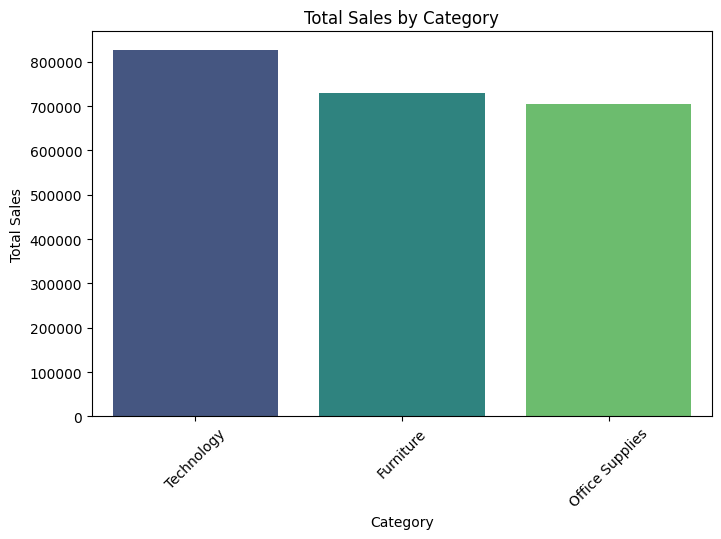

In [51]:
#import seaborn as sns
#import matplotlib.pyplot as plt

# Plot Sales by Category
plt.figure(figsize=(8,5))
sns.barplot(x=category_sales["Category"], y=category_sales["Total_Sales"], palette="viridis")
plt.title("Total Sales by Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()


#### 5.2: Top Customers (Pie Chart)
We'll plot a pie chart for the top 5 customers by total spending

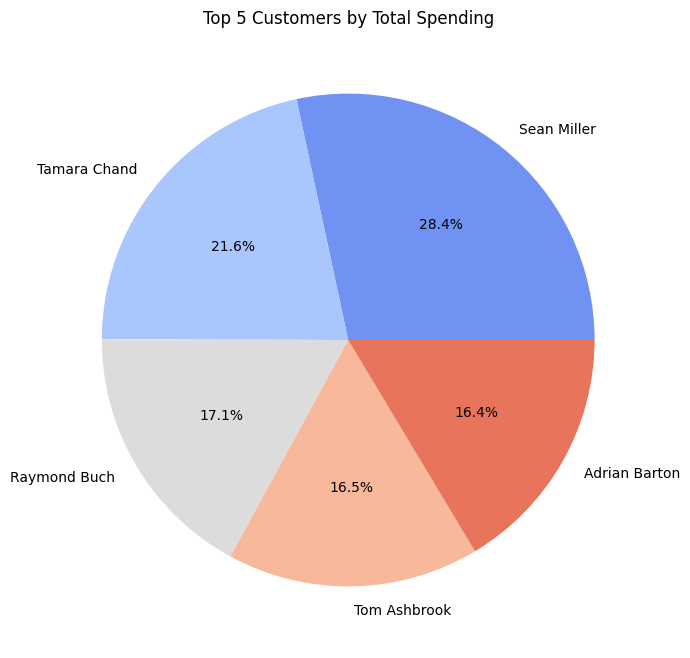

In [52]:
# Pie Chart for Top Customers
plt.figure(figsize=(8, 8))
plt.pie(top_customers["Total_Spending"], labels=top_customers["Customer Name"], autopct='%1.1f%%', colors=sns.color_palette("coolwarm", 5))
plt.title("Top 5 Customers by Total Spending")
plt.show()


#### 5.3:Monthly Sales Trend (Line Chart)
We'll visualize monthly sales trends using a line chart

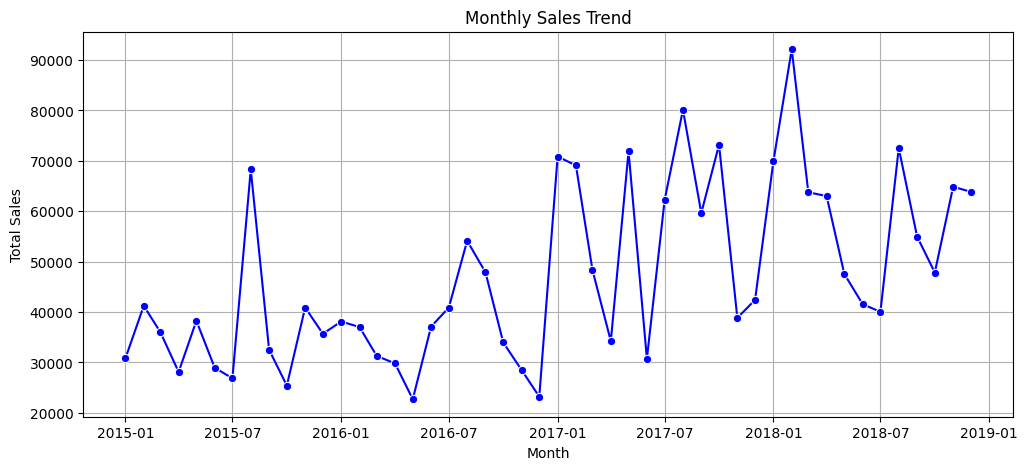

In [53]:
# Convert Month column to datetime
monthly_sales["Month"] = pd.to_datetime(monthly_sales["Month"])

# Line Chart
plt.figure(figsize=(12, 5))
sns.lineplot(x=monthly_sales["Month"], y=monthly_sales["Total_Sales"], marker='o', color='b')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()
